In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sklearn

In [2]:
train=pd.read_csv(r"C:\Users\이재학\titanic\train.csv")

In [3]:
test=pd.read_csv(r"C:\Users\이재학\titanic\test.csv")

In [4]:
gender_submission=pd.read_csv(r"C:\Users\이재학\titanic\gender_submission.csv")

In [5]:
from sklearn.ensemble import RandomForestClassifier

y = train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [6]:
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort=False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    

    plt.plot(aspect='auto')
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature + '\'s ratio in total')
    plt.show()

    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
        plt.pie([survived[index], dead[index]], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
        plt.title(str(index) + '\'s ratio')

    plt.show()

In [7]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

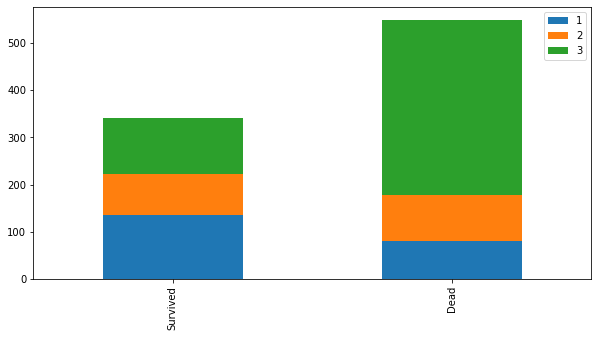

In [8]:
bar_chart('Pclass')

In [9]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
del train['Name']

In [11]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [12]:
for i in range(len(train['Sex'])):
    if train['Sex'][i]=='female':
        train['Sex'][i]=0.74
    else:
        train['Sex'][i]=0.18

C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0.18,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,0.74,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,0.74,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,0.74,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0.18,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0.18,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,0.74,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,0.74,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,0.18,26.0,0,0,111369,30.0000,C148,C


In [14]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0.18,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,0.74,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,0.74,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,0.74,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0.18,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0.18,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,0.74,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,0.74,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,0.18,26.0,0,0,111369,30.0000,C148,C


In [15]:
del train['Ticket']

In [16]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,0.18,22.0,1,0,7.2500,NaN,S
1,2,1,1,0.74,38.0,1,0,71.2833,C85,C
2,3,1,3,0.74,26.0,0,0,7.9250,NaN,S
3,4,1,1,0.74,35.0,1,0,53.1000,C123,S
4,5,0,3,0.18,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0.18,27.0,0,0,13.0000,NaN,S
887,888,1,1,0.74,19.0,0,0,30.0000,B42,S
888,889,0,3,0.74,NaN,1,2,23.4500,NaN,S
889,890,1,1,0.18,26.0,0,0,30.0000,C148,C


In [17]:
del train['Fare']

In [18]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,1,0,3,0.18,22.0,1,0,NaN,S
1,2,1,1,0.74,38.0,1,0,C85,C
2,3,1,3,0.74,26.0,0,0,NaN,S
3,4,1,1,0.74,35.0,1,0,C123,S
4,5,0,3,0.18,35.0,0,0,NaN,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0.18,27.0,0,0,NaN,S
887,888,1,1,0.74,19.0,0,0,B42,S
888,889,0,3,0.74,NaN,1,2,NaN,S
889,890,1,1,0.18,26.0,0,0,C148,C


In [19]:
del train['Cabin']

In [20]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,0.18,22.0,1,0,S
1,2,1,1,0.74,38.0,1,0,C
2,3,1,3,0.74,26.0,0,0,S
3,4,1,1,0.74,35.0,1,0,S
4,5,0,3,0.18,35.0,0,0,S
...,...,...,...,...,...,...,...,...
886,887,0,2,0.18,27.0,0,0,S
887,888,1,1,0.74,19.0,0,0,S
888,889,0,3,0.74,NaN,1,2,S
889,890,1,1,0.18,26.0,0,0,C


In [21]:
train['Embarked'][1]

'C'

In [22]:
for i in range(891):
    if train['Embarked'][i]=='S':
        train['Embarked'][i]=0
    elif train['Embarked'][i]=='C':
        train['Embarked'][i]=1
    else:
        train['Embarked'][i]=2

C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [23]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,0.18,22.0,1,0,0
1,2,1,1,0.74,38.0,1,0,1
2,3,1,3,0.74,26.0,0,0,0
3,4,1,1,0.74,35.0,1,0,0
4,5,0,3,0.18,35.0,0,0,0
...,...,...,...,...,...,...,...,...
886,887,0,2,0.18,27.0,0,0,0
887,888,1,1,0.74,19.0,0,0,0
888,889,0,3,0.74,NaN,1,2,0
889,890,1,1,0.18,26.0,0,0,1


In [24]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000


In [25]:
train.Age=train.Age.fillna(29.7)

In [26]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,0.18,22.0,1,0,0
1,2,1,1,0.74,38.0,1,0,1
2,3,1,3,0.74,26.0,0,0,0
3,4,1,1,0.74,35.0,1,0,0
4,5,0,3,0.18,35.0,0,0,0
...,...,...,...,...,...,...,...,...
886,887,0,2,0.18,27.0,0,0,0
887,888,1,1,0.74,19.0,0,0,0
888,889,0,3,0.74,29.7,1,2,0
889,890,1,1,0.18,26.0,0,0,1


In [27]:
X_train=train.iloc[0:,2:]

In [28]:
Y_train=train.iloc[0:,1]

X_val=train.iloc[500:,2:]

Y_val=train.iloc[500:,1]

from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression

model=LogisticRegression()

model.fit(X_train,Y_train)

X_train

In [ ]:
print(model.score(X_train,Y_train))

model.fit(X_val,Y_val)

Y_pred=model.predict(X_val)

from sklearn.metrics import accuracy_score

accuracy_score(Y_pred,Y_val)

print(model.score(X_val,Y_val))

In [29]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [30]:
for i in range(418):
    if test['Embarked'][i]=='S':
        test['Embarked'][i]=0
    elif test['Embarked'][i]=='C':
        test['Embarked'][i]=1
    else:
        test['Embarked'][i]=2

C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [31]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,0


In [32]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [33]:
for i in range(len(test['Sex'])):
    if test['Sex'][i]=='female':
        test['Sex'][i]=0.74
    else:
        test['Sex'][i]=0.18

C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0.18,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0.74,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0.18,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0.18,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.74,22.0,1,1,3101298,12.2875,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0.18,NaN,0,0,A.5. 3236,8.0500,NaN,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0.74,39.0,0,0,PC 17758,108.9000,C105,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0.18,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0
416,1308,3,"Ware, Mr. Frederick",0.18,NaN,0,0,359309,8.0500,NaN,0


In [35]:
test.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [37]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [38]:
test.Age=test.Age.fillna(30.272590)

In [39]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0.18,34.50000,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0.74,47.00000,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0.18,62.00000,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0.18,27.00000,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.74,22.00000,1,1,3101298,12.2875,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0.18,30.27259,0,0,A.5. 3236,8.0500,NaN,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0.74,39.00000,0,0,PC 17758,108.9000,C105,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0.18,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0
416,1308,3,"Ware, Mr. Frederick",0.18,30.27259,0,0,359309,8.0500,NaN,0


In [40]:
del test['Name']
del test['Ticket']
del test['Fare']
del test['Cabin']

In [41]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,0.18,22.0,1,0,0
1,2,1,1,0.74,38.0,1,0,1
2,3,1,3,0.74,26.0,0,0,0
3,4,1,1,0.74,35.0,1,0,0
4,5,0,3,0.18,35.0,0,0,0
...,...,...,...,...,...,...,...,...
886,887,0,2,0.18,27.0,0,0,0
887,888,1,1,0.74,19.0,0,0,0
888,889,0,3,0.74,29.7,1,2,0
889,890,1,1,0.18,26.0,0,0,1


In [42]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,0.18,34.50000,0,0,2
1,893,3,0.74,47.00000,1,0,0
2,894,2,0.18,62.00000,0,0,2
3,895,3,0.18,27.00000,0,0,0
4,896,3,0.74,22.00000,1,1,0
...,...,...,...,...,...,...,...
413,1305,3,0.18,30.27259,0,0,0
414,1306,1,0.74,39.00000,0,0,1
415,1307,3,0.18,38.50000,0,0,0
416,1308,3,0.18,30.27259,0,0,0


In [43]:
x_test=test.iloc[:,1:]

In [44]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
k_fold=KFold(n_splits=10,shuffle=True,random_state=0)
clf=RandomForestClassifier(n_estimators=50,max_depth=6,random_state=0)
cross_val_score(clf,X_train,Y_train,cv=k_fold,scoring='accuracy').mean()

0.8148189762796504

In [46]:
clf=RandomForestClassifier(n_estimators=50,max_depth=6,random_state=0)
clf.fit(X_train,Y_train)
gender_submission['Survived']=clf.predict(x_test)
gender_submission.to_csv('titanic-submission2.csv',index=False)

In [ ]:
gender_submission['Survived']=model.predict(x_test)
gender_submission.to_csv('titanic-submission1.csv',index=False)
